In [1]:
import os
import pandas as pd
import numpy as np
import umap
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegressionCV
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table("./data/RNALfold_COV_data.tsv")
meta = pd.read_table("./data/rna_fold_labels.tsv")

In [3]:
data

,fold,energy,start,accession,label,num_loops,positions_paired,positions_looped,max_loop_size,max_stem_size,length
0,.(((.(..(((.....)))..).))).,-0.4,27576,NC_028814.1,0,1,14,13,5,5,27
1,.(((.((.(..........).))))).,-0.8,27572,NC_028814.1,0,1,12,15,10,8,27
2,.(((..(((....)))....))).,-1.0,27569,NC_028814.1,0,1,12,12,4,3,24
3,.(((........))).,-1.9,27567,NC_028814.1,0,1,6,10,8,3,16
4,.((.(((..(((....)))....))).)).,-2.4,27566,NC_028814.1,0,1,16,14,4,6,30
...,...,...,...,...,...,...,...,...,...,...,...
107999,.(((((((((((((.((((.......)))))).))))............,-46.0,49,NC_016996.1,0,5,100,46,10,18,146
108000,.((((((((((((...((((((.((((.......)))))).)))))...,-47.9,41,NC_016996.1,0,5,110,42,9,13,152
108001,.(((((...))))).,-5.0,39,NC_016996.1,0,1,10,5,3,5,15
108002,.((((((...(((..((.((((...((((((.((((.......)))...,-44.9,32,NC_016996.1,0,4,92,31,7,11,123


In [4]:
X = data[['start','energy','num_loops','positions_paired','positions_looped','max_loop_size','max_stem_size','length']].values

In [5]:
X

array([[ 2.7576e+04, -4.0000e-01,  1.0000e+00, ...,  5.0000e+00,
         5.0000e+00,  2.7000e+01],
       [ 2.7572e+04, -8.0000e-01,  1.0000e+00, ...,  1.0000e+01,
         8.0000e+00,  2.7000e+01],
       [ 2.7569e+04, -1.0000e+00,  1.0000e+00, ...,  4.0000e+00,
         3.0000e+00,  2.4000e+01],
       ...,
       [ 3.9000e+01, -5.0000e+00,  1.0000e+00, ...,  3.0000e+00,
         5.0000e+00,  1.5000e+01],
       [ 3.2000e+01, -4.4900e+01,  4.0000e+00, ...,  7.0000e+00,
         1.1000e+01,  1.2300e+02],
       [ 5.0000e+00, -9.3000e+00,  1.0000e+00, ...,  4.0000e+00,
         1.4000e+01,  3.5000e+01]])

In [6]:
X_scaled = preprocessing.scale(X)

In [130]:
#epsilon .04 = .96 accuracy
#epsilin .036 = 1.0 accuracy
clusters = DBSCAN(eps=.036,min_samples=1).fit(X_scaled)

In [131]:
Counter(clusters.labels_)

Counter({0: 1,
         1: 1,
         2: 1,
         3: 4,
         4: 1,
         5: 1,
         6: 1,
         7: 1,
         8: 1,
         9: 1,
         10: 1,
         11: 18,
         12: 1,
         13: 1,
         14: 1,
         15: 1,
         16: 1,
         17: 2,
         18: 1,
         19: 1,
         20: 1,
         21: 1,
         22: 1,
         23: 1,
         24: 1,
         25: 1,
         26: 1,
         27: 1,
         28: 1,
         29: 1,
         30: 1,
         31: 1,
         32: 1,
         33: 1,
         34: 1,
         35: 1,
         36: 1,
         37: 1,
         38: 1,
         39: 1,
         40: 1,
         41: 1,
         42: 1,
         43: 1,
         44: 1,
         45: 1,
         46: 1,
         47: 1,
         48: 1,
         49: 1,
         50: 1,
         51: 1,
         52: 1,
         53: 1,
         54: 1,
         55: 1,
         56: 1,
         57: 1,
         58: 1,
         59: 1,
         60: 1,
         61: 1,
         62: 1,
 

In [132]:
len(Counter(clusters.labels_).keys())

97015

In [133]:
data['rna_word'] = clusters.labels_

In [134]:
rna_word_groups = data[['fold','rna_word']].groupby('rna_word')

In [135]:
rna_word_dict = {word:list(rna_word_groups.get_group(word)['fold'].unique()) for word in rna_word_groups.groups.keys()}

In [136]:
rna_word_dict

{0: ['.(((.(..(((.....)))..).))).'],
 1: ['.(((.((.(..........).))))).'],
 2: ['.(((..(((....)))....))).'],
 3: ['.(((........))).'],
 4: ['.((.(((..(((....)))....))).)).'],
 5: ['.((.((((((...(((((.((((((........))))))))))).)))))))).'],
 6: ['.((((..(((((........))))))))).'],
 7: ['.((((......(((((((((((........)))))).......((((((........))))))..))))).....)))).'],
 8: ['.((((((........)))))).'],
 9: ['.((.((((.(((((((((.(.(((.((((((((........))))..)))).)))))))))....)))).)))))).'],
 10: ['.((((..(.((((((........)))))))..)))).'],
 11: ['.((((...)))).'],
 12: ['.(((.((....(((((((((((((((..((((.(((((((........)))))).).))))..)).))).))).)).)))))....)).))).'],
 13: ['.(((.(((..((((..((.(((.......)))))..))))))).))).'],
 14: ['.((((...((((((((..((.(((.......)))))..))))((((((..(((..(((((........))))))))))))))....((((((........)))))).)))).)))).'],
 15: ['.(((.(((.(((..((((..((.(((.......)))))..))))))).)))((((..(((((........)))))))))...(((((.((((((........)))))))))))))).'],
 16: ['.((((.(((((((((

In [137]:
data = data[data['rna_word'] != -1]
samples = data.groupby('accession')


In [138]:
X_train = np.zeros((len(data['accession'].unique()),len(data['rna_word'].unique())),dtype='int16')

In [139]:
X_train.shape

(38, 97015)

In [140]:
for i,group in enumerate(samples.groups.keys()):
    for j in samples.get_group(group)['rna_word']:
        X_train[i,j] += 1
#X_train = preprocessing.Binarizer().fit_transform(X_train)

In [141]:
y_train = [samples.get_group(group)['label'].unique()[0] for group in samples.groups.keys()]

In [142]:
clf = LogisticRegressionCV(Cs=50,penalty='l1',verbose=3,solver='liblinear',cv=5,max_iter=500,n_jobs=-1,tol=.00000001)

In [143]:
clf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 128 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


[LibLinear]

LogisticRegressionCV(Cs=50, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=500, multi_class='auto', n_jobs=-1, penalty='l1',
                     random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=1e-08, verbose=3)

In [144]:
clf.score(X_train,y_train)

1.0

In [145]:
Counter(clf.coef_[0])

Counter({0.0: 96999,
         -0.03076849443971963: 1,
         -0.037133912746709456: 1,
         -0.9830718753316736: 1,
         0.3935040481888555: 1,
         -0.060601061996093594: 1,
         -0.03342137720091766: 1,
         0.16553469158196818: 1,
         0.15272851809683047: 1,
         -0.2926477988705976: 1,
         -0.33797865173480857: 1,
         -0.3821190136644377: 1,
         0.050412956696742554: 1,
         0.18879388469248792: 1,
         -0.08735329291039427: 1,
         -0.2048717903216452: 1,
         0.2639546050491069: 1})

In [146]:
coefs = pd.DataFrame({'predictor':range(X_train.shape[1]),'coef':clf.coef_[0]})

In [147]:
coefs[coefs['coef'] != 0]

,predictor,coef
63,63,-0.030768
463,463,-0.037134
516,516,-0.983072
555,555,0.393504
583,583,-0.060601
598,598,-0.033421
702,702,0.165535
1037,1037,0.152729
2361,2361,-0.292648
2524,2524,-0.337979


In [148]:
for p in coefs[coefs['coef'] != 0]['predictor']:
    print(rna_word_dict[p])

['.((....)).']
['.((((...)))).']
['.(((......))).']
['.((((....)))).']
['.(((....))).']
['.((((...)))).']
['.(((((....))))).']
['.(((....))).']
['.(((((....))))).']
['.((((...)))).']
['.((((....)))).']
['.(((....))).']
['.(((....))).']
['.((((....)))).']
['.((((....)))).']
['.((.(((((((....))))))).)).', '.(((((((.((....)).))))))).']


In [158]:
test = data[data['rna_word'] == 29605]['accession'].value_counts()

In [159]:
labels = pd.Series(dict(zip(meta['accession'],meta['label'])))
labels.name='accession'

In [160]:
output = pd.concat([test,labels],axis=1)
output.columns = ['count','label']
output

,count,label
NC_006577.2,7.0,1
NC_001846.1,1.0,0
NC_035191.1,NaN,0
NC_028752.1,NaN,0
NC_003045.1,NaN,0
NC_032730.1,NaN,0
NC_034972.1,NaN,0
NC_016994.1,NaN,0
NC_028833.1,NaN,0
NC_002306.3,NaN,0


In [85]:
output.to_csv("eps.04_16668_rna_word.csv",sep='\t')

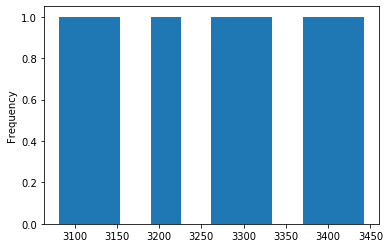

In [161]:
data[(data['rna_word'] == 29605) & (data['label'] == 1)]['start'].plot.hist(bins=10)

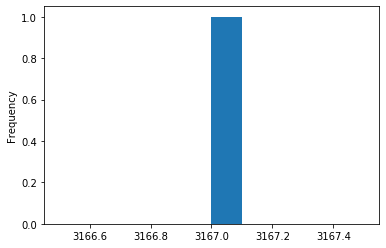

In [162]:
data[(data['rna_word'] == 29605) & (data['label'] == 0)]['start'].plot.hist(bins=10)

In [88]:
data[(data['rna_word'] == 18868) & (data['label'] == 1)].sort_values('energy')

,fold,energy,start,accession,label,num_loops,positions_paired,positions_looped,max_loop_size,max_stem_size,length,rna_word
19083,.(((((....))))).,-2.5,14667,NC_019843.3,1,1,10,6,4,5,16,18868
24759,.(((((....))))).,-2.3,14736,MN908947.3,1,1,10,6,4,5,16,18868
24783,.(((((....))))).,-2.2,14512,MN908947.3,1,1,10,6,4,5,16,18868
44547,.(((((....))))).,-2.2,14598,NC_005831.2,1,1,10,6,4,5,16,18868
81974,.(((((....))))).,-2.2,14442,NC_004718.3,1,1,10,6,4,5,16,18868
24775,.(((((....))))).,-2.1,14596,MN908947.3,1,1,10,6,4,5,16,18868


In [89]:
word18868 = data[(data['rna_word'] == 18868) & (data['label'] == 1)][['accession','start','length']]

In [90]:
word18868

,accession,start,length
19083,NC_019843.3,14667,16
24759,MN908947.3,14736,16
24775,MN908947.3,14596,16
24783,MN908947.3,14512,16
44547,NC_005831.2,14598,16
81974,NC_004718.3,14442,16


In [91]:
word18868['end'] = word18868['start'] + word18868['length']

In [92]:
word18868

,accession,start,length,end
19083,NC_019843.3,14667,16,14683
24759,MN908947.3,14736,16,14752
24775,MN908947.3,14596,16,14612
24783,MN908947.3,14512,16,14528
44547,NC_005831.2,14598,16,14614
81974,NC_004718.3,14442,16,14458


In [93]:
word18868[['accession','start','end']].sort_values(["accession","start"]).to_csv("word18868.bed",sep='\t',index=False,header=False)